<h2>Introduction to Python</h2>
<h3>Learn how read a file, shuffle data, filter data, plot data, split file into training and test sets</h3>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Modified IRIS Dataset - Introduced NaNs for some of the observations
# Dataset: https://archive.ics.uci.edu/ml/datasets/Iris/

In [2]:
df = pd.read_csv('IrisMissingData.csv')

In [ ]:
df.head(10)

In [38]:
df.loc[0:2]

,sepal_length,sepal_width,petal_length,petal_width,class


In [ ]:
df.loc[7]

In [ ]:
df['sepal_length']

In [ ]:
df[['sepal_length','sepal_width']]

In [ ]:
df.head(10)

In [ ]:
df.tail()

In [ ]:
df = df.fillna(df.mean())

In [ ]:
df.head(10)

In [ ]:
df.tail()

In [14]:
df.shape

(150, 5)

In [51]:
# Print first 5 index values and last 5 index values
index_list = list(df.index)
print(index_list[:5])
print(index_list[-5:])

[47, 123, 129, 30, 52]
[65, 23, 145, 85, 100]


In [52]:
# Randomize a list
np.random.seed(5)
np.random.shuffle(index_list)

In [61]:
print('Shuffled list')
print(index_list[:5])
print(index_list[-5:])

Shuffled list
[124, 36, 5, 39, 6]
[75, 72, 8, 131, 78]


In [62]:
# Dataframe is now shuffled
df = df.iloc[index_list]

In [63]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
110,6.5,3.2,5.1,2.0,Iris-virginica
62,NaN,2.2,4.0,1.0,Iris-versicolor
67,5.8,2.7,4.1,1.0,Iris-versicolor
61,5.9,3.0,4.2,1.5,Iris-versicolor
64,5.6,2.9,3.6,NaN,Iris-versicolor
94,5.6,2.7,4.2,1.3,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica
81,5.5,2.4,3.7,1.0,Iris-versicolor
39,5.1,3.4,1.5,0.2,Iris-setosa
53,5.5,2.3,4.0,1.3,Iris-versicolor


In [64]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
30,4.8,3.1,1.6,0.2,Iris-setosa
127,6.1,NaN,4.9,1.8,Iris-virginica
3,4.6,3.1,1.5,0.2,Iris-setosa
122,7.7,2.8,6.7,2.0,Iris-virginica
32,5.2,4.1,1.5,0.1,Iris-setosa


In [65]:
# Split data into training and test sets
# training = 70%
# test = 30%
size = df.shape[0]
train = round(size *.7)
test = size - train

In [66]:
size, train, test

(150, 105, 45)

In [68]:
df[:train].to_csv('iris_data_train.csv',index=True,index_label='Row',
columns=['sepal_length','sepal_width','petal_length','petal_width','class'])

In [69]:
df[train:].to_csv('iris_data_test.csv',index=True,index_label='Row',
          columns=['sepal_length','sepal_width','petal_length','petal_width'])

In [72]:
df['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

In [74]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,148.000000,147.000000,146.000000,148.000000
mean,5.836486,3.056463,3.748630,1.205405
std,0.830552,0.433695,1.765502,0.762897
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [75]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
110,6.5,3.2,5.1,2.0,Iris-virginica
62,NaN,2.2,4.0,1.0,Iris-versicolor
67,5.8,2.7,4.1,1.0,Iris-versicolor
61,5.9,3.0,4.2,1.5,Iris-versicolor
64,5.6,2.9,3.6,NaN,Iris-versicolor


In [89]:
# Find all rows that match the condition.  Returns a Series that contains index value and True/False
setosa = df['class'] == 'Iris-setosa'

In [90]:
setosa.head()

110    False
62     False
67     False
61     False
64     False
Name: class, dtype: bool

In [91]:
# Pull only setosa's
df[setosa].head()

,sepal_length,sepal_width,petal_length,petal_width,class
39,5.1,3.4,1.5,0.2,Iris-setosa
43,5.0,3.5,1.6,0.6,Iris-setosa
26,5.0,3.4,1.6,0.4,Iris-setosa
40,5.0,3.5,1.3,0.3,Iris-setosa
36,5.5,3.5,1.3,0.2,Iris-setosa


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Petal Length Histogram')

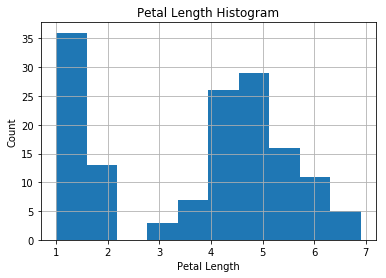

In [92]:
plt.hist(df.petal_length)
plt.grid(True)
plt.xlabel('Petal Length')
plt.ylabel('Count')
plt.title('Petal Length Histogram')

Text(0.5, 1.0, 'Petal Length Scatter Plot')

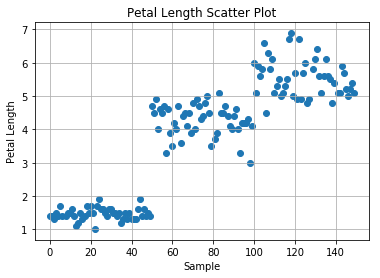

In [93]:
plt.scatter(df.index, df.petal_length)
plt.grid(True)
plt.xlabel('Sample') 
plt.ylabel('Petal Length')
plt.title('Petal Length Scatter Plot')

In [94]:
versicolor = df['class'] == "Iris-versicolor"
virginica = df['class'] == "Iris-virginica"

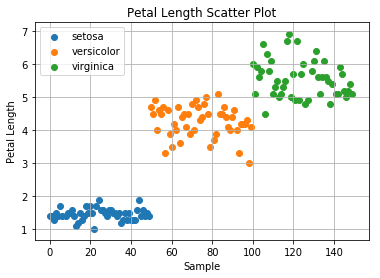

In [95]:
plt.scatter(df[setosa].index, df[setosa].petal_length, label ='setosa')
plt.scatter(df[versicolor].index, df[versicolor].petal_length, label = 'versicolor')
plt.scatter(df[virginica].index, df[virginica].petal_length, label = 'virginica')
plt.grid(True)
plt.xlabel('Sample') 
plt.ylabel('Petal Length')
plt.title('Petal Length Scatter Plot')
plt.legend()